In [1]:
# Data Source: https://www.kaggle.com/worldbank/world-development-indicators
# Folder: 'world-development-indicators'

<br><p style="font-family: Arial; font-size:3.75em;color:purple; font-style:bold">
Matplotlib: Exploring <br> <br> <br>Data Visualization</p><br><br>

<br><br><center><h1 style="font-size:2em;color:#2467C0">World Development Indicators</h1></center>
<br>
<table>
<col width="550">
<col width="450">
<tr>
<td><img src="https://upload.wikimedia.org/wikipedia/commons/4/46/North_South_divide.svg" align="middle" style="width:550px;height:360px;"/></td>
<td>
This week, we will be using an open dataset from <a href="https://www.kaggle.com">Kaggle</a>. It is  <a href="https://www.kaggle.com/worldbank/world-development-indicators">The World Development Indicators</a> dataset obtained from the World Bank containing over a thousand annual indicators of economic development from hundreds of countries around the world.
<br>
<br>
This is a slightly modified version of the original dataset from <a href="http://data.worldbank.org/data-catalog/world-development-indicators">The World Bank</a>
<br>
<br>
List of the <a href="https://www.kaggle.com/benhamner/d/worldbank/world-development-indicators/indicators-in-data">available indicators</a> and a <a href="https://www.kaggle.com/benhamner/d/worldbank/world-development-indicators/countries-in-the-wdi-data">list of the available countries</a>.
</td>
</tr>
</table>

In [4]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv('C:/Users/daala/Desktop/Python for data Science/Data Visualization 5/Week5-Visualization 2 2/Indicators.csv')
data.shape

(5656458, 6)

In [6]:
data.head(10)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06
5,Arab World,ARB,Arms imports (SIPRI trend indicator values),MS.MIL.MPRT.KD,1960,5.380000e+08
6,Arab World,ARB,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1960,4.769789e+01
7,Arab World,ARB,CO2 emissions (kt),EN.ATM.CO2E.KT,1960,5.956399e+04
8,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,6.439635e-01
9,Arab World,ARB,CO2 emissions from gaseous fuel consumption (%...,EN.ATM.CO2E.GF.ZS,1960,5.041292e+00


In [7]:
countries = data['CountryName'].unique().tolist()
len(countries)

247

### How many years of data do we have ?

In [8]:
# How many years of data do we have ?
years = data['Year'].unique().tolist()
len(years)

56

### What's the range of years?

In [9]:
print(min(years)," to ",max(years))

1960  to  2015


<p style="font-family: Arial; font-size:2.5em;color:blue; font-style:bold">
Matplotlib: Basic Plotting, Part 1</p><br>

### Lets pick a country and an indicator to explore: Age dependency ratio and the USA

In [11]:
# select CO2 emissions for the United States
hist_indicator = 'Age dependency ratio'
hist_country = 'USA'

mask1 = data['IndicatorName'].str.contains(hist_indicator) 
mask2 = data['CountryCode'].str.contains(hist_country)

# stage is just those indicators matching the USA for country code and CO2 emissions over time.
stage = data[mask1 & mask2]

In [12]:
stage.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22221,United States,USA,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,66.524844
22222,United States,USA,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,15.230264
22223,United States,USA,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,51.294580
48688,United States,USA,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1961,67.061661
48689,United States,USA,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1961,15.421149


### Let's see how age dependency have changed over time using MatplotLib

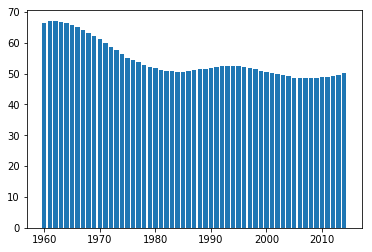

In [13]:
# get the years
years = stage['Year'].values
# get the values 
Age_dependency_ratio = stage['Value'].values

# create
plt.bar(years,Age_dependency_ratio)
plt.show()

Turns out age dependency dropped a bit over time, but let's make this graphic a bit more appealing before we continue to explore it.

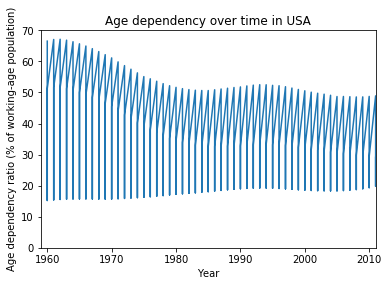

In [14]:
# switch to a line plot
plt.plot(stage['Year'].values, stage['Value'].values)

# Label the axes
plt.xlabel('Year')
plt.ylabel(stage['IndicatorName'].iloc[0])

#label the figure
plt.title('Age dependency over time in USA')

# to make more honest, start they y axis at 0
plt.axis([1959, 2011,0,70])

plt.show()

### Using Histograms to explore the distribution of values
We could also visualize this data as a histogram to better explore the ranges of values in Age depencdency. 

In [15]:
# If you want to just include those within one standard deviation fo the mean, you could do the following
# lower = stage['Value'].mean() - stage['Value'].std()
# upper = stage['Value'].mean() + stage['Value'].std()
# hist_data = [x for x in stage[:10000]['Value'] if x>lower and x<upper ]

# Otherwise, let's look at all the data
hist_data = stage['Value'].values

In [16]:
print(len(hist_data))

165


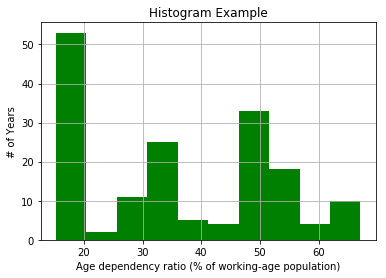

In [17]:
# the histogram of the data
plt.hist(hist_data, 10, normed=False, facecolor='green')

plt.xlabel(stage['IndicatorName'].iloc[0])
plt.ylabel('# of Years')
plt.title('Histogram Example')

plt.grid(True)

plt.show()

So the USA has many years where it age depedency is between 30 to 55 with outliers on start side.

### But how do the USA's numbers relate to those of other countries?

In [18]:
# select Age dependency ratio for all countries in 2011
hist_indicator = 'Age dependency ratio'
hist_year = 2011

mask1 = data['IndicatorName'].str.contains(hist_indicator) 
mask2 = data['Year'].isin([hist_year])

# apply our mask
age_2011 = data[mask1 & mask2]
age_2011.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5026238,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,2011,61.797336
5026239,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,2011,6.675140
5026240,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,2011,53.324237
5026753,Caribbean small states,CSS,Age dependency ratio (% of working-age populat...,SP.POP.DPND,2011,51.175428
5026754,Caribbean small states,CSS,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,2011,11.636502


In [20]:
print(len(age_2011))

681


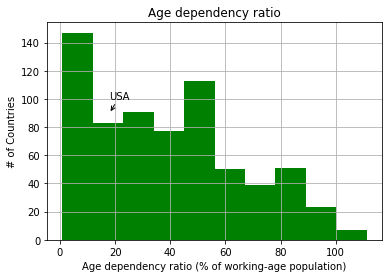

In [24]:
# let's plot a histogram of the emmissions per capita by country

# subplots returns a touple with the figure, axis attributes.
fig, ax = plt.subplots()

ax.annotate("USA",
            xy=(18, 90), xycoords='data',
            xytext=(18, 100), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )

plt.hist(age_2011['Value'], 10, normed=False, facecolor='green')

plt.xlabel(stage['IndicatorName'].iloc[0])
plt.ylabel('# of Countries')
plt.title('Age dependency ratio')

#plt.axis([10, 22, 0, 14])
plt.grid(True)

plt.show()